In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 100)

## Decision Tree Classifier Model:

In [4]:
cv = []                              #defining list which will contain cv score for each KNN model
m = 0                                #variable to contain the maximum cv score 
k = list(range(20,0,-1))             #list of 1 to 20 minimum sample leaf
n = list(range(1,6))                 #list of 1 to 5 maximum tree depth
for i in k:                          #iterating through values of k to find optimum number of minimum sample leaf
    for j in n:                      #iterating through values of n to find optimum number of maximum tree depth
        Decision_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = j, min_samples_leaf = i) #Defining Decidion tree classification model
        scores = cross_val_score(Decision_tree, X_train, y_train, cv=10, scoring='accuracy') #obtaining accuracy for each fold of cross validation
        a = np.mean(scores)          #obtaining cv score by averaging absolute values of RMSE
        cv.append(a)                 #appending cv score to the list
        if np.mean(scores) > m:      #cv score is less than minimum cv score
            m = np.mean(scores)      #update value of minimum cv score
            p = (j, i, m)            #creating tuple for minimum cv score and corresponding maximum tree depth & minimum sample leaf
print(p)
cv3 = p[2]

(2, 20, 0.9618181818181819)


In [5]:
Decision_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 2, min_samples_leaf = 20)
clf_gini = Decision_tree.fit(X_train,y_train)

In [6]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [7]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
out=tree.export_graphviz(clf_gini, feature_names=featureNames, out_file = dot_data, class_names = np.unique(y_train), filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 300))
plt.imshow(img,interpolation='nearest')

In [9]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
clf_gini.score(X_test, y_test)

0.9333333333333333

In [11]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

In [12]:
#Sensitivity = TP/(AP=TP+FN)
#Specificity = TN/(AN=FP+TN)
#Precision = TP/(PP=TP+FP)

In [13]:
#Setosa
Sensitivity = 15/(15+0)
Specificity = 30/(0+30)
Precision = 15/(15+0)

In [14]:
#Versicolor
Sensitivity = 15/(15+0)
Specificity = 27/(3+27)
Precision = 15/(15+3)

In [15]:
#Virginica
Sensitivity = 12/(12+3)
Specificity = 30/(0+30)
Precision = 12/(12+0)

## KNN Classifier Model:

In [16]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

(1, 0.9718181818181819)


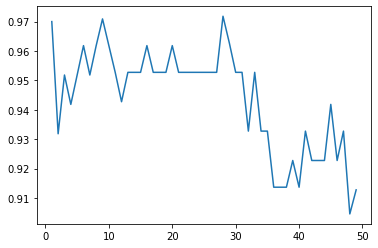

In [17]:
from sklearn.model_selection import cross_val_score
neighbors = list(range(1,50))
cv_scores = []
m = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    if np.mean(scores) > m:  #cv score is less than maximum cv score
        m = np.mean(scores)  #update value of maximum cv score
        p = (i, m)                   #creating tuple of maximum cv score and corresponding value of k
plt.plot(neighbors,cv_scores)                       #plotting graph of neighbours against cv
print(p)

In [18]:
knn = KNeighborsClassifier(n_neighbors = 1)
#fitting the model
knn.fit(X_train,y_train)
#predicting the responses
y_pred = knn.predict(X_test)

In [19]:
knn.score(X_test,y_test)

0.9555555555555556

In [20]:
#to create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
#diagonal values of confusion matrix denotes correct predictions
#in this case 43(15+15+13) are correctly predicted by model out of total 45(15+15+15)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

In [21]:
#Sensitivity = TP/(AP=TP+FN)
#Specificity = TN/(AN=FP+TN)
#Precision = TP/(PP=TP+FP)

In [22]:
#Setosa
Sensitivity = 15/(15+0)
Specificity = 30/(0+30)
Precision = 15/(15+0)

In [23]:
#Versicolor
Sensitivity = 15/(15+0)
Specificity = 27/(2+27)
Precision = 15/(15+2)

In [24]:
#Virginica
Sensitivity = 13/(13+2)
Specificity = 30/(0+30)
Precision = 13/(13+0)